## Week8 - Example9 and Task4

### Example 9

We’ll now implement a Metropolis-Hastings sampler to sample from the posterior distribution for the
probability a coin flip shows heads.


We imagine that we have flipped the coin 10 times and 2 heads have occurred.
From these data we can calculate a log likelihood for this observation given a uniform prior on the probability

In [1]:
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tfd = tfp.distributions

In [5]:
def log_likelihood(p):
    # number of flips
    N=10
    # number of heads
    h=2
    # calculate likelihood given p
    likelihood = tfd.Binomial(N,probs=p).log_prob(h)
    # calculate prior value of p
    prior = tfd.Uniform().log_prob(p)
    # return combined log likelihood
    return likelihood + prior

Next we set up a function to run the sampler.

In [6]:
@tf.function
def run_sampler():
    # specify the Metropolis Hastings inner kernel
    inner_kernel = tfp.mcmc.RandomWalkMetropolis(log_likelihood)
    # we need to keep the probability between 0 and 1 so we use a sigmoid bijector
    kernel = tfp.mcmc.TransformedTransitionKernel(inner_kernel,
    tfp.bijectors.Sigmoid())
    # now we can run the actual MCMC chain
    samples, _ = tfp.mcmc.sample_chain(num_results=2000,
    current_state=0.5,
    kernel=kernel,
    num_burnin_steps=50)
    return samples

Now, we can run the sampler and plot the posterior distributions. We can also compare this to the true
posterior distribution which is known in this simple example.

/opt/conda/lib/python3.8/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


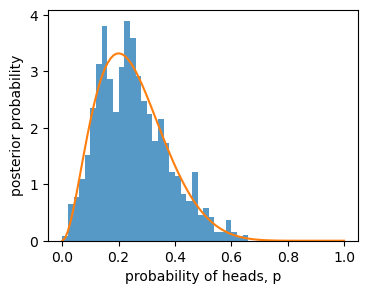

In [7]:
# run the sampler
s = run_sampler()

# plot the posterior density from the samples
plt.figure(figsize=(4,3))
hist = plt.hist(s.numpy(),bins=50,range=(0,1),density=True,alpha=0.75)

# we will also plot the analytical posterior
x = np.linspace(0,1,100)
n_heads = 2
N = 10
posterior = tfd.Beta(concentration1=1+n_heads, concentration0=1+N-n_heads)
plt.plot(x,posterior.prob(x))
plt.xlabel('probability of heads, p')
plt.ylabel('posterior probability')
plt.show()

## Task4

You flip a coin 100 times and observe 45 heads.
    
Use the **Metropolis Hastings** algorithm to determine the posterior distribution for the probability of obtaining heads in a single coin flip

/opt/conda/lib/python3.8/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


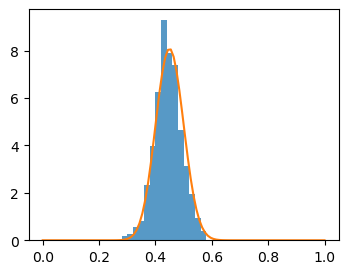

In [28]:
def log_likelihood(p):
    N=100
    h=45
    likelihood = tfd.Binomial(N,probs=p).log_prob(h)
    prior = tfd.Uniform().log_prob(p)
    return likelihood + prior
    
    
@tf.function
def run_sampler():
    # specify the Metropolis Hastings inner kernel
    inner_kernel = tfp.mcmc.RandomWalkMetropolis(log_likelihood)
    # we need to keep the probability between 0 and 1 so we use a sigmoid bijector
    kernel = tfp.mcmc.TransformedTransitionKernel(inner_kernel, tfp.bijectors.Sigmoid())
    # now we can run the actual MCMC chain
    samples, kernels_results = tfp.mcmc.sample_chain(num_results=2000,
                current_state=0.5,
                kernel=kernel,
                num_burnin_steps=50)
    return samples

    
# run the sampler
s = run_sampler()


# plot the posterior density from the samples
plt.figure(figsize=(4,3))
hist = plt.hist(s.numpy(),bins=50,range=(0,1),density=True,alpha=0.75)

# we will also plot the analytical posterior
x = np.linspace(0,1,100)
n_heads = 45
N = 100
posterior = tfd.Beta(concentration1=1+n_heads, concentration0=1+N-n_heads)
plt.plot(x,posterior.prob(x))
plt.show()